In [1]:
import numpy as np
import scipy
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt

### defining functions

In [11]:
def fitzhugh_1(t, y, a1, b1, c1, I1, d1, v2):
    #voltage variable
    v = y[0]
    #refractory variable
    w = y[1]
    #define system
    dv = -v**3+(1+a1)*v**2-a1*v-w+I1+d1*v2
    dw = b1*v
    return np.array([dv,dw])

def fitzhugh_2(t, y, a2, b2, c2, I2, d2, v1):
    #voltage variable
    v = y[0]
    #refractory variable
    w = y[1]
    #define system
    dv = -v**3+(1+a2)*v**2-a2*v-w+I2+d2*v1
    dw = b2*v
    return np.array([dv,dw])

### set initial conditions f1

In [18]:
#define time and initial conditions
t0, t1 = 0, 20                    # start and end
t = np.linspace(t0, t1, 100)      # the points of evaluation of solution
y0_1 = [2, 0]                       # initial value
y1 = np.zeros((len(t), len(y0_1)))   # array for solution
y1[0, :] = y0_1

#define fitzhugh_1 inputs
a1 = 0.3
b1=0.01
c1=0.01

#current input
I1=0.1

d1 = 0.1
v2 = 0.1

### set initial conditions f2

In [13]:
#define time and initial conditions
t0, t1 = 0, 20                    # start and end
t = np.linspace(t0, t1, 100)      # the points of evaluation of solution
y0_2 = [2, 0]                       # initial value
y2 = np.zeros((len(t), len(y0_2)))   # array for solution
y2[0, :] = y0_2

#define fitzhugh_1 inputs
a2 = 0.3
b2=0.01
c2=0.01

#current input
I2=0.1

d2 = 1
v1 = .1

### Seperate Runs

In [14]:
#set up f1
r1 = integrate.ode(fitzhugh_1).set_integrator('vode', method='bdf', order=15)  # set integrator similiar to ODE45
r1.set_initial_value(y0_1, t0)#.set_f_params(a, b, c, I, d1, v2)   # initial values

#set up f2
r2 = integrate.ode(fitzhugh_2).set_integrator('vode', method='bdf', order=15)  # set integrator similiar to ODE45
r2.set_initial_value(y0_2, t0)#.set_f_params(a, b, c, I, d1, v2)   # initial values

#integrator loop
for i in range(1, t.size):
    r1.set_f_params(a1, b1, c1, I1, d1, v2)
    y1[i, :] = r1.integrate(t[i])  # get one more value, add it to the array
    if not r1.successful():
        raise RuntimeError("Could not integrate")
                
#integrator loop
for i in range(1, t.size):
    r2.set_f_params(a2, b2, c2, I2, d2, v1)
    y2[i, :] = r2.integrate(t[i])  # get one more value, add it to the array
    if not r2.successful():
        raise RuntimeError("Could not integrate")
        

p_1 = y1[:,0:1]
v_1 = y1[:,1:2]

p_2 = y2[:,0:1]
v_2 = y2[:,1:2]

### Coupled Run

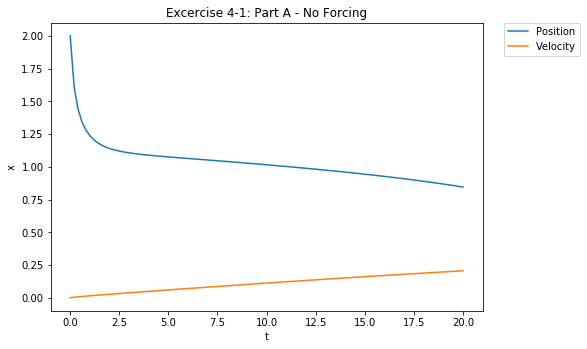

In [15]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(t,p_1, label = 'Position')
ax.plot(t,v_1, label = 'Velocity')

#title axis
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('Excercise 4-1: Part A - No Forcing')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

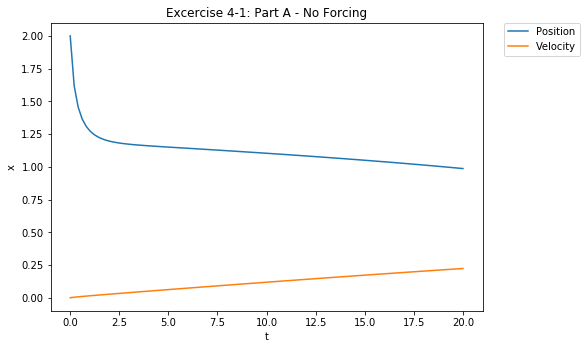

In [16]:
#create figure object
fig = plt.figure()

#plot each set of y values with respect to time
ax = fig.add_axes([0,0,1,1])

ax.plot(t,p_2, label = 'Position')
ax.plot(t,v_2, label = 'Velocity')

#title axis
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('Excercise 4-1: Part A - No Forcing')

#include legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()